In [15]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import bernoulli

## Bernoulli
La distribución de Bernoulli es un modelo teórico utilizado para representar una variable aleatoria discreta la cual solo puede resultar en dos sucesos mutuamente excluyentes. 

Un experimento de Bernoulli se caracteriza por tener solo dos resultados. ... De este modo, en otras palabras, la distribución binomial se define como una serie de experimentos o ensayos en los que solo podemos tener 2 posibles resultados (éxito o fracaso), siendo el éxito la variable aleatoria.

In [16]:
universo = ['cara','sello']
p_cara = 1/2

bernoulli.rvs(p=p_cara) #rvs = Random variable sample

0

In [17]:
universo[bernoulli.rvs(p=p_cara)]

'cara'

In [18]:
bernoulli.rvs(p=p_cara, size=10) 

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [19]:
sum(bernoulli.rvs(p=p_cara, size=10) )

3

In [20]:
# Al hacer diferentes experimentos como en la linea de arriba
# Llegamos a la distribucion binomial de n experimentos
from scipy.stats import binom
binom.rvs(p=p_cara, n=10, size=100)

array([4, 4, 6, 6, 3, 4, 7, 6, 6, 5, 6, 3, 6, 6, 6, 3, 5, 8, 5, 4, 4, 4,
       5, 3, 7, 8, 4, 6, 5, 6, 4, 7, 6, 5, 1, 6, 5, 6, 6, 7, 5, 3, 6, 7,
       4, 5, 6, 4, 3, 4, 1, 4, 4, 3, 4, 6, 7, 7, 7, 6, 5, 3, 1, 5, 5, 3,
       6, 6, 3, 4, 6, 5, 7, 0, 3, 7, 3, 5, 7, 5, 2, 7, 5, 5, 6, 5, 5, 4,
       5, 6, 5, 5, 4, 4, 2, 4, 3, 4, 5, 2])

Concepto de distribucion de probabilidad: Algunos valores sucederan con mayor frecuencia de otros.

In [21]:
import pandas as pd
pd.Series(binom.rvs(p=p_cara, n=10, size=100)).value_counts()/100

5    0.25
4    0.20
3    0.18
6    0.18
7    0.08
2    0.06
8    0.02
9    0.02
1    0.01
dtype: float64

## Medidas de tendencia central

In [22]:
import scipy
import scipy.stats

In [23]:
df = pd.read_csv('bicicletas-compartidas.csv')

In [24]:
df.shape

(17414, 10)

In [25]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [26]:
y = df['bicis-compartidas'].values

In [27]:
y

array([182, 138, 134, ..., 337, 224, 139])

In [28]:
y = np.where(y==0, 1, y)

In [29]:
np.min(y)

1

In [30]:
np.max(y)

7860

In [31]:
np.mean(y)

1143.1016997817849

In [32]:
np.median(y)

844.0

In [33]:
np.sum(y)

19905973

In [34]:
scipy.stats.mstats.hmean(y) #Media armonica

241.65180305136826

### Tipos de media
1. Media armonica:  fórmula de la media armónica (H) de un conjunto de números x1, x2, x3, …, xn, es la siguiente:

La media armónica es la recíproca de la media aritmética. Los elementos del conjunto deben ser necesariamente no nulos. Esta media es poco sensible a los valores grandes y los infravalora respecto a la media aritmética, pero muy sensible a los valores próximos a cero, ya que los recíprocos 1/Xi son muy altos, por lo que les da más peso que en las medias aritmética y geométrica. Si algún valor fuese cero, la media armónica quedaría indeterminada.

2. Medie geometrica: La media geométrica (MG) de un conjunto de números estrictamente positivos (X1, X2,…,XN) es la raíz N-ésima del producto de los N elementos.


3. Media aritmetica: Convencional.

In [35]:
np.median(y)

844.0

#### Calculando la moda

In [36]:
#Para calcular la moda
#moda = valor de y con la maxima frecuencia

moda = np.nan

valores, conteo_valores = np.unique(y, return_counts=True)
pos = np.argmax(conteo_valores)
moda = valores[pos]
print(moda)

46


In [37]:
np.std(y)

1085.0768508213835

## Revisiones

In [38]:
y_alterado = y.copy()
y_alterado[y_alterado==max(y_alterado)] = 10000000

In [39]:
print(np.mean(y_alterado))

1716.9009417709888


In [40]:
print( np.mean(y))

1143.1016997817849


In [41]:
print(np.median(y))

844.0


In [42]:
print(np.median(y_alterado))

844.0


## Diagramas de frecuencias para variables continuas y discretas
Representaciones de categorias o numeros que puede tomar una variable aleatoria.


* Variables categoricas: Tablas de frecuencias
* Variables numericas: Percenntiles, deciles, quintiles, cuartiles, outliers o valores extremos

In [43]:
df = pd.read_csv('bicicletas-compartidas.csv')

In [44]:
#Frecuencias para variables categoricas
ycat = df['cuartil-ano']
ycat = ycat.apply(lambda x:  'Cat-' + str(int(x)) )
ycat.head(5)

0    Cat-3
1    Cat-3
2    Cat-3
3    Cat-3
4    Cat-3
Name: cuartil-ano, dtype: object

In [45]:
valores, conteo_freq = np.unique(ycat, return_counts = True)

In [46]:
valores

array(['Cat-0', 'Cat-1', 'Cat-2', 'Cat-3'], dtype=object)

In [47]:
conteo_freq

array([4394, 4387, 4303, 4330])

In [48]:
tabla_frequencias = dict(zip(valores, conteo_freq))

In [49]:
tabla_frequencias

{'Cat-0': 4394, 'Cat-1': 4387, 'Cat-2': 4303, 'Cat-3': 4330}

In [50]:
# variable numerica
ynum = df['viento'].copy()

In [51]:
np.min(ynum), np.max(ynum)

(0.0, 56.5)

In [52]:
np.percentile(ynum, q=100)
np.percentile(ynum, q=50)

15.0

In [53]:
np.percentile(ynum, q=25)

10.0

In [54]:
valores = [0,25,50,75,100]
np.percentile(ynum, q=valores)

array([ 0. , 10. , 15. , 20.5, 56.5])

In [55]:
deciles = list(range(0,110,10))
np.percentile(ynum, q=deciles)

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

In [59]:
y = pd.DataFrame(y)
y.describe()

0
count  17414.000000
mean    1143.101700
std     1085.108007
min        1.000000
25%      257.000000
50%      844.000000
75%     1671.750000
max     7860.000000

In [60]:
#Outlier Identificar
Q1 = np.percentile(ynum, q=25)
Q3 = np.percentile(ynum, q=75)

RI = Q3 - Q1

lim_inf = Q1 - 1.5*RI
lim_sup = Q3 + 1.5*RI
print(lim_inf)
print(lim_sup)

-5.75
36.25


(array([1100., 4559., 4198., 4285., 1985.,  868.,  300.,   86.,   27.,
           6.]),
 array([ 0.  ,  5.65, 11.3 , 16.95, 22.6 , 28.25, 33.9 , 39.55, 45.2 ,
        50.85, 56.5 ]),
 <BarContainer object of 10 artists>)

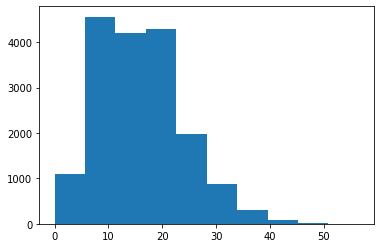

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(ynum)

## Visualizacion de datos 

In [62]:
import seaborn as sns

In [63]:
df = pd.read_csv('bicicletas-compartidas.csv')

### Categoricas

In [64]:
y = df['cuartil-ano'].apply(lambda x: 'cuartil'+str(x))

In [65]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

Text(0, 0.5, 'Frecuencia')

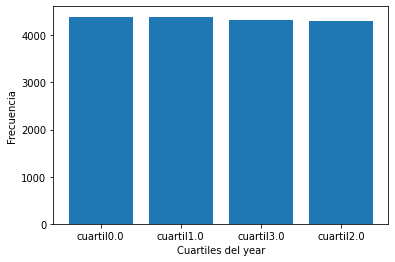

In [66]:
fig, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts())
ax.set_xlabel('Cuartiles del year')
ax.set_ylabel('Frecuencia')

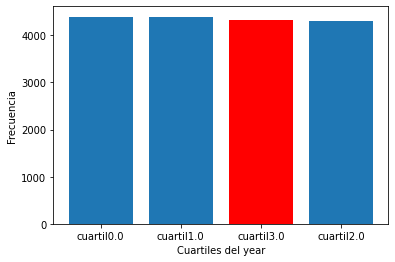

In [67]:
fig, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts())
ax.set_xlabel('Cuartiles del year')
ax.set_ylabel('Frecuencia')
ax.patches[2].set_facecolor('red')

Text(0.5, 1.0, 'Diagrama de pie')

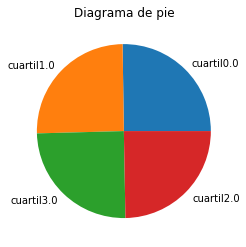

In [68]:
fig, ax = plt.subplots()
ax.pie(y.value_counts(), labels= y.value_counts().index)
ax.set_title('Diagrama de pie')

### Numericas

In [69]:
y = df['viento']

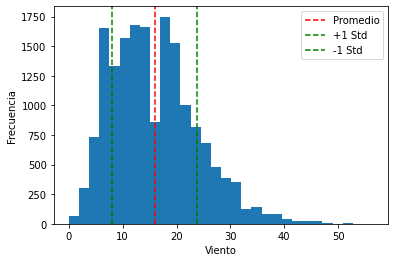

In [70]:
fig, ax = plt.subplots()
ax.hist(y, bins=30)
ax.set_xlabel('Viento')
ax.set_ylabel('Frecuencia')
ax.axvline(np.mean(y), c='r', linestyle='--', label='Promedio')
ax.axvline(np.mean(y)+np.std(y), c='g', linestyle='--', label='+1 Std')
ax.axvline(np.mean(y)-np.std(y), c='g', linestyle='--', label='-1 Std')
ax.legend()

## Boxplot y Scatterplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f49811a45c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f49811a4b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f49811a42e8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f49811b5128>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f49811b5400>],
 'means': []}

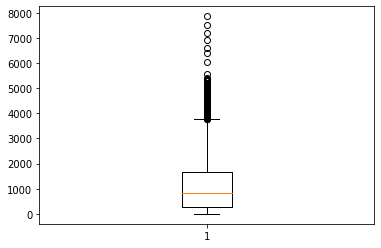

In [71]:
y = df['bicis-compartidas']

fig, ax = plt.subplots()

ax.boxplot(x=y)

<AxesSubplot:xlabel='cuartil-ano', ylabel='bicis-compartidas'>

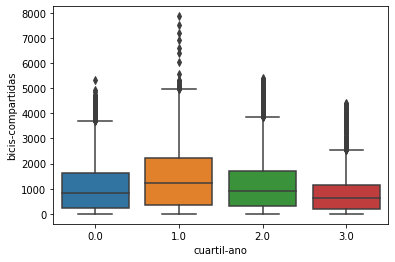

In [72]:
fig, ax = plt.subplots()

sns.boxplot(x='cuartil-ano',y='bicis-compartidas',data=df)

Text(0, 0.5, 'Bicis compartidas')

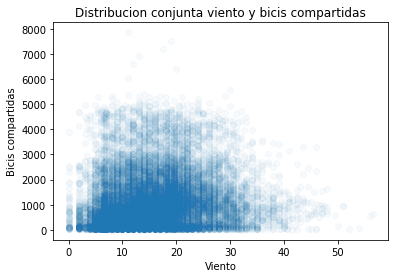

In [73]:
fig, ax = plt.subplots()
ax.scatter(df['viento'], df['bicis-compartidas'], alpha= 0.03)
ax.set_title('Distribucion conjunta viento y bicis compartidas')
ax.set_xlabel('Viento')
ax.set_ylabel('Bicis compartidas')

## Teorema de Bayes: Inferir la probabilidad de A al estar condicionado a B

* Probabilidad UNI VARIADA
* Probabilidad CONJUNTA BI VARIADA
* Probabilidad Condicional

In [74]:
df = pd.read_csv('juego-azar.csv', sep=';')


In [75]:
df.numero.value_counts() / len(df)

1    0.4
2    0.3
3    0.3
Name: numero, dtype: float64

In [76]:
df.color.value_counts()

negro     6
blanco    4
Name: color, dtype: int64

In [77]:
df.groupby(['color','numero']).size()

color   numero
blanco  1         1
        2         1
        3         2
negro   1         3
        2         2
        3         1
dtype: int64

In [78]:
df.groupby(['color','numero']).size()/len(df)

color   numero
blanco  1         0.1
        2         0.1
        3         0.2
negro   1         0.3
        2         0.2
        3         0.1
dtype: float64

Probabilidad condicional: UN evento A dado B

 P(A|B) = P(Blanca|2)
 
 
NUmero de esferas blancas con el numero 2 es 1 y el numero total de esferas con el numero 2 son 3:


 P(A|B) = 1/3

In [79]:
#p_blanca = 4/10

## Funciones de distribucion discreta y continua

Distribuciones discretas:  
* Rango: Debe contener todos los valores de x
* Probabilidad: NO debe superar 1
* Probabilidad acumulada: Suma de las probabilidades de tener un valor igual o menor a cualquier xi
* Regla de completitud del espacio: La suma de todas las probabilidades de los valores de xi tiene que sumar 1.
* Valor esperado: Promedio
* Varianza

Distribuciones continuas:
* Lo mismo que arriba pero con formulas de densidad continua.

In [80]:
from scipy.stats import binom

In [81]:
p = 0.3
n = 8
x = list(range(0,9,1))
y = list([])

In [82]:
for i in x:
    y.append(binom.pmf(i, p=p, n=n))

In [83]:
y

[0.05764801000000002,
 0.1976503200000001,
 0.2964754800000002,
 0.25412184,
 0.1361367,
 0.04667544000000001,
 0.010001879999999989,
 0.0012247199999999988,
 6.560999999999994e-05]

#### Probability Mass Function O funcion de densidad de probabilidad:
En la teoría de la probabilidad, la función de densidad de probabilidad, función de densidad, o simplemente densidad de una variable aleatoria continua describe la probabilidad relativa según la cual dicha variable aleatoria tomará determinado valor.
La probabilidad de que la 

Text(0, 0.5, 'Probabilidad discreta')

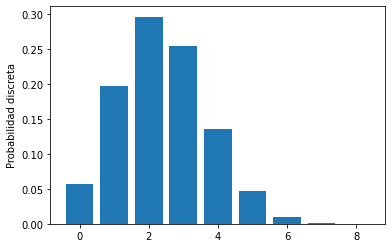

In [84]:
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('Probabilidad discreta')

In [85]:
np.sum(y)

1.0000000000000002

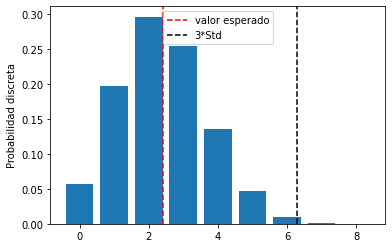

In [86]:
media = np.average(x, weights=y) #Promedio ponderado por la probabilidad de cada xi
varianza = np.average( ((x-media)**2), weights=y)

media, varianza

fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('Probabilidad discreta')
ax.axvline(x=media, c='r', linestyle='--', label='valor esperado')
ax.axvline(x = media  + 3*np.sqrt(varianza), c='k', linestyle='--', label='3*Std')
ax.legend()

## Funciones de distribucion discreta y continua

In [87]:
N = 100
x = list(range(1,N+1,1))
y = list([])

for i in x:
    y.append(binom.pmf(i, p=0.3, n=N))

In [88]:
y

[1.3862042184105933e-14,
 2.9407332347710807e-13,
 4.117026528679382e-12,
 4.278766856591813e-11,
 3.5208138705672277e-10,
 2.389123697884838e-09,
 1.37496506694588e-08,
 6.850272387105447e-08,
 3.001071712446251e-07,
 1.1704179678540456e-06,
 4.104063004163861e-06,
 1.3045057406091572e-05,
 3.784500170558246e-05,
 0.00010079128005262849,
 0.0002476585738436032,
 0.000563865502947482,
 0.0011940681238887599,
 0.0023597060543514643,
 0.00436456909301092,
 0.007575644925726078,
 0.012368399878738114,
 0.019034485527667042,
 0.027665028655117337,
 0.038039414400788354,
 0.04955992276217045,
 0.061269135282903536,
 0.07196692080848441,
 0.08041201865846266,
 0.08556155679915357,
 0.08678386475342778,
 0.08398438524524879,
 0.07761057029360002,
 0.06853920493460677,
 0.057883950385953564,
 0.04677968235272963,
 0.03619856372532685,
 0.026834456506805493,
 0.019066587517993245,
 0.012990422265006426,
 0.008490168837485806,
 0.005324844567064698,
 0.0032057737699674217,
 0.0018531715480874773

Text(0.5, 1.0, 'Probabilidad continua')

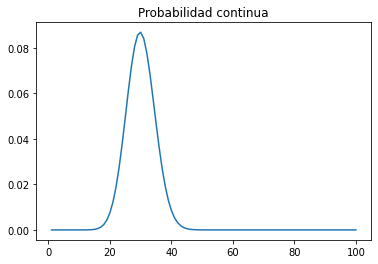

In [89]:
fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_title('Probabilidad continua')

Funcion de probabilidad acumulada: La probabilidad de  determinado valor mas la probabilidad de los valores menores.

Text(0.5, 1.0, 'Probabilidad continua')

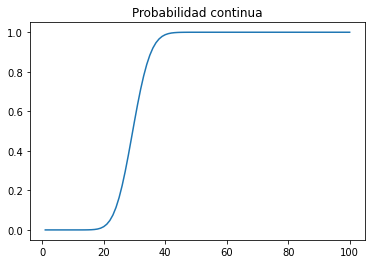

In [90]:
N = 100
x = list(range(1,N+1,1))
y = list([])

for i in x:
    y.append(binom.cdf(i, p=0.3, n=N))
fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_title('Probabilidad continua')

In [91]:
from scipy.stats import norm
mean, var, skew, kurt = norm.stats(moments = 'mvsk')
print(mean, var, skew, kurt)

0.0 1.0 0.0 0.0


#### Asimetria

Coeficiente de asimetría basado en momentos
También conocido como el coeficiente de asimetría de Fisher-Pearson, se basa en momentos centrales:

asimetría=m3S3
Donde S3 es la desviación típica elevada al cubo y mr es lo que se conoce como el Momento central de orden r, donde r puede ser cualquier entero positivo y se calcula se la siguiente manera.

mr=1n∗∑i=1n(xi−X¯)r

Interpretación:

asimetría=0: Distribución simétrica

asimetría>0: Distribución asimétrica a la derecha

asimetría<0: Distribución asimétrica a la izquierda

#### Kurtosis

Kurtosis
Otra medida que se utiliza para describir la forma de la distribución es la kurtósis o curtósis. Esta utiliza el moomento central estandarizado de orden 4 para detectar valores extremos. En presencia de valores extremos, la forma de la distribución parece más puntiaguda; por esto la kurtósis se conoce como una medida del apuntalamiento de la distribución.

Dada una muestra x1,x2,...,xn, la kurtósis se calcula como

m4/S4

Este valor lo comparamos con 3, y dependiendo de ello, decimos que la distribución es Platicúrtica, Mesocúrtica o Leptocúrtica:

Si kurtosis<3 la distribución es Platicúrtica

Si kurtosis=3 la distribución es Mesocúrtica

Si kurtosis>3 la distribución es Leptocúrtica


Al igual que con la asimetría basada en momentos, podemos llegar a una expresión basada en los datos estandarizados.

m4S4=1n∗∑i=1n(x1−X¯S)4=1n∗∑i=1nz4i



## Distribuciones de mayor aplicacion discretas

1. Bernoulli: Experimento binario asociado a exito o fracaso.
2. Binomial: Numero de exitos x en N ensayos.
3. Geometrica: Numero de ensayos x hasta 1 exito.
4. Binomial Negativa: Numero de ensayos x hasta en k-esimo exito.
5. Poisson: Numero de llegadas en N a una longitud de tiempo t

#### Bernoulli

In [92]:
import matplotlib as plt
%matplotlib inline
from scipy.stats import bernoulli
import seaborn as sns

p = 0.3
data = bernoulli.rvs(p, size=100)
len(data)

100

In [93]:
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
mean, var, skew, kurt

(array(0.3), array(0.21), array(0.87287156), array(-1.23809524))

/home/jp/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


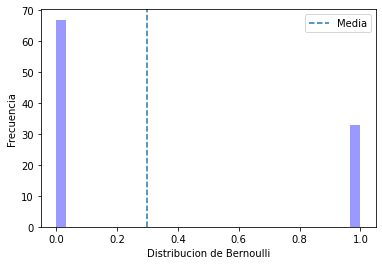

In [94]:
ax = sns.distplot(data, bins=30, kde=False, color='blue')
ax.set(xlabel='Distribucion de Bernoulli', ylabel='Frecuencia')
ax.axvline(x=mean, linestyle='--',label='Media')
ax.legend()

#### Binomial

In [95]:
import matplotlib as plt
%matplotlib inline
from scipy.stats import binom
import seaborn as sns

n=10
p = 0.3
data = binom.rvs(p=p,n=n, size=100)
len(data)

mean, var, skew, kurt = binom.stats(p=p,n=n, moments='mvsk')
mean, var, skew, kurt

(array(3.), array(2.1), array(0.27602622), array(-0.12380952))

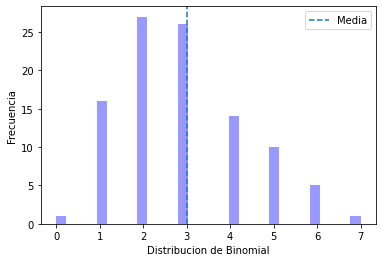

In [96]:
ax = sns.distplot(data, bins=30, kde=False, color='blue')
ax.set(xlabel='Distribucion de Binomial', ylabel='Frecuencia')
ax.axvline(x=mean, linestyle='--',label='Media')
ax.legend()

#### Binomial Geometrica

In [97]:
import matplotlib as plt
%matplotlib inline
from scipy.stats import nbinom
import seaborn as sns

n=1
p = 0.3
data = nbinom.rvs(p=p,n=n, size=100)
len(data)

mean, var, skew, kurt = nbinom.stats(p=p,n=n, moments='mvsk')
mean, var, skew, kurt

(array(2.33333333), array(7.77777778), array(2.03188864), array(6.12857143))

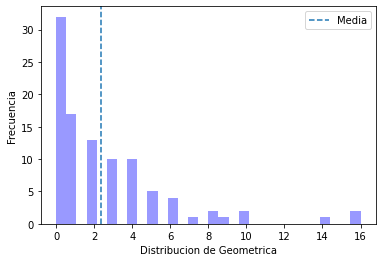

In [98]:

ax = sns.distplot(data, bins=30, kde=False, color='blue')
ax.set(xlabel='Distribucion de Geometrica', ylabel='Frecuencia')
ax.axvline(x=mean, linestyle='--',label='Media')
ax.legend()


#### Binomial Negativa

In [99]:
import matplotlib as plt
%matplotlib inline
from scipy.stats import nbinom
import seaborn as sns

n=100
p = 0.3
data = nbinom.rvs(p=p,n=n, size=100)
len(data)

mean, var, skew, kurt = nbinom.stats(p=p,n=n, moments='mvsk')
mean, var, skew, kurt

(array(233.33333333),
 array(777.77777778),
 array(0.20318886),
 array(0.06128571))

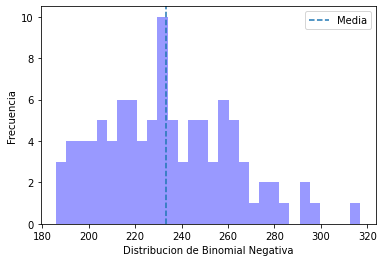

In [100]:

ax = sns.distplot(data, bins=30, kde=False, color='blue')
ax.set(xlabel='Distribucion de Binomial Negativa', ylabel='Frecuencia')
ax.axvline(x=mean, linestyle='--',label='Media')
ax.legend()

#### Poisson

In [101]:
import matplotlib as plt
%matplotlib inline
from scipy.stats import poisson
import seaborn as sns

lambda_p = 3
data = poisson.rvs(mu=lambda_p, size=100)
len(data)

mean, var, skew, kurt = poisson.stats(mu=lambda_p,moments='mvsk')
mean, var, skew, kurt

(array(3.), array(3.), array(0.57735027), array(0.33333333))

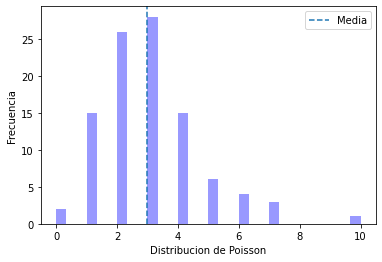

In [102]:

ax = sns.distplot(data, bins=30, kde=False, color='blue')
ax.set(xlabel='Distribucion de Poisson', ylabel='Frecuencia')
ax.axvline(x=mean, linestyle='--',label='Media')
ax.legend()

## Distribuciones de mayor aplicacion continuas

1. Distribucion Exponencial
2. Distribucion Normal
3. Distribucion Uniforme

In [103]:
import matplotlib as plt
%matplotlib inline
from scipy.stats import expon
import seaborn as sns

data = expon.rvs(size=100000)
len(data)

mean, var, skew, kurt = expon.stats(moments='mvsk')
mean, var, skew, kurt

(array(1.), array(1.), array(2.), array(6.))

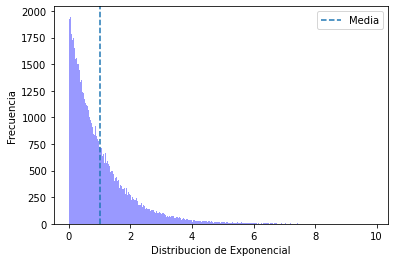

In [104]:
ax = sns.distplot(data, bins=500, kde=False, color='blue')
ax.set(xlabel='Distribucion de Exponencial', ylabel='Frecuencia')
ax.axvline(x=mean, linestyle='--',label='Media')
ax.legend()

In [105]:
from scipy.stats import norm
import seaborn as sns

data = norm.rvs(size=100000)
len(data)

mean, var, skew, kurt = norm.stats(moments='mvsk')
mean, var, skew, kurt

(array(0.), array(1.), array(0.), array(0.))

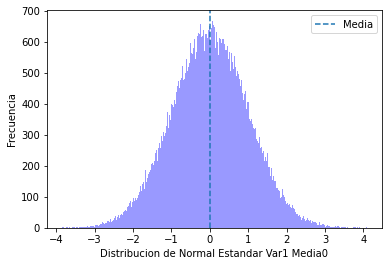

In [106]:
ax = sns.distplot(data, bins=500, kde=False, color='blue')
ax.set(xlabel='Distribucion de Normal Estandar Var1 Media0', ylabel='Frecuencia')
ax.axvline(x=mean, linestyle='--',label='Media')
ax.legend()

In [107]:
from scipy.stats import uniform
import seaborn as sns

data = uniform.rvs(size=100000)
len(data)

mean, var, skew, kurt = uniform.stats(moments='mvsk')
mean, var, skew, kurt

(array(0.5), array(0.08333333), array(0.), array(-1.2))

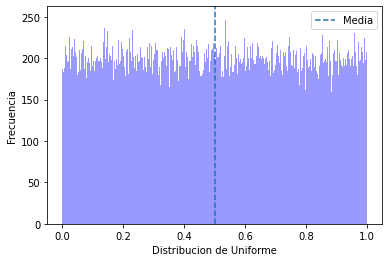

In [108]:
ax = sns.distplot(data, bins=500, kde=False, color='blue')
ax.set(xlabel='Distribucion de Uniforme', ylabel='Frecuencia')
ax.axvline(x=mean, linestyle='--',label='Media')
ax.legend()

## Estandarizacion, covarianza y correlacion

* Estandarizar una variable implica restar su media y dividir sobre su desviacion estandar, lo que se conoce como centrar y reducir en el orden anterior.
El resultado de la aplicacion de la estandarizacion es una Variable Aleatoria Z con valor esperado 0 y std .
* Covarianza y correlacion: Mediran el valor lineal de la relacion xy, a diferencia de la correlacion la covarianza nos hablara de la direccion de la relacion xy, la correlacion nos da la direccion y la fuerza que tiene la relacion xy.

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [110]:
df = pd.read_csv('iris-data.csv', index_col=0)

In [111]:
df.columns

Index(['lar.sepalo', 'anc.sepalo', 'lar.petalo', 'anc.petalo', 'tipo_flor'], dtype='object')

In [112]:
df.tipo_flor.value_counts()

0.0    50
2.0    50
1.0    50
Name: tipo_flor, dtype: int64

In [113]:
y = df['lar.petalo']

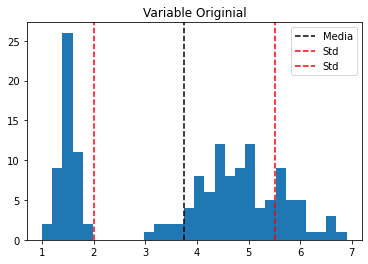

In [114]:
fig, ax = plt.subplots()
ax.set_title('Variable Originial')
ax.hist(y, bins=30)
ax.axvline(x=np.mean(y), c='k', label='Media', linestyle='--')
ax.axvline(x=np.mean(y)+np.std(y), c='r', label='Std', linestyle='--')
ax.axvline(x=np.mean(y)-np.std(y), c='r', label='Std', linestyle='--')
ax.legend()

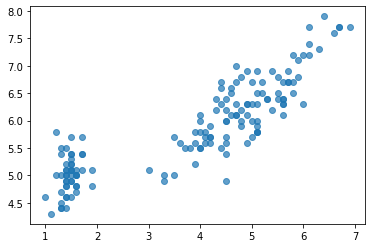

In [115]:
#Calcular covarianza
fig, ax = plt.subplots()
ax.scatter(df['lar.petalo'],df['lar.sepalo'], alpha=0.7)
ax.autoscale()

In [116]:
np.cov(df['lar.petalo'], df['lar.sepalo']) #Sabemos por la segunda columna del first row y la primera columna del second row la covarianza positiva de 1.27 que tienen las variables

array([[3.11627785, 1.27431544],
       [1.27431544, 0.68569351]])

In [117]:
df.corr()

lar.sepalo  anc.sepalo  lar.petalo  anc.petalo  tipo_flor
lar.sepalo    1.000000   -0.117570    0.871754    0.817941   0.782561
anc.sepalo   -0.117570    1.000000   -0.428440   -0.366126  -0.426658
lar.petalo    0.871754   -0.428440    1.000000    0.962865   0.949035
anc.petalo    0.817941   -0.366126    0.962865    1.000000   0.956547
tipo_flor     0.782561   -0.426658    0.949035    0.956547   1.000000

<AxesSubplot:>

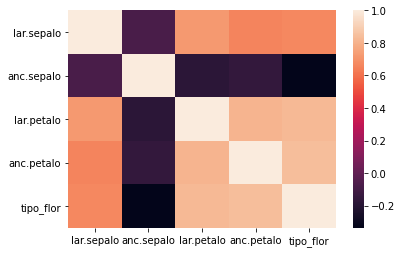

In [118]:
sns.heatmap(df.corr(method='kendall'))

## Estimadores a traves de datos

Inferir a partir de la muestra los parametros poblacionales.
* Estimador: Tiene que estar centrado(insesgado) tenga como resultado el valor que queremos calcular, tiene que tener la menor varianza posible, y es deseable que la relacion sea lineal respecto a las variables de la muestra.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy import stats
import seaborn as sns
%matplotlib inline

from scipy.stats import norm

/home/jp/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
x1 = 3
x2 = 10

mu1 = 4
mu2 = 7
sigma=1

p_muestra = norm.pdf(x1,mu1, sigma)
p_muestra

0.24197072451914337

In [3]:
p_muestra = norm.pdf(x1,mu2, sigma)
p_muestra

0.00013383022576488537

In [4]:
p_muestra = norm.pdf(x1,mu2, sigma)*norm.pdf(x2,mu2, sigma)
p_muestra

5.931152735254122e-07

In [5]:
p_muestra = norm.pdf(x1,mu1, sigma)*norm.pdf(x2,mu1, sigma)
p_muestra

1.4701857752651781e-09

In [6]:
muestra_10 = norm.rvs(5, sigma, size=10)

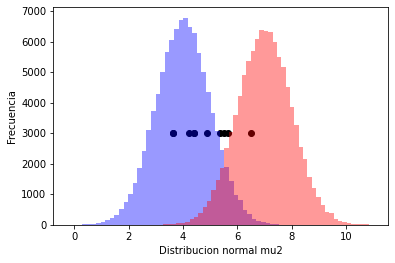

In [10]:
data1 = norm.rvs(mu1, sigma, size=100000)
data2 = norm.rvs(mu2, sigma, size=100000)
#y = df['lar.petalo']

ax= sns.distplot(data1, bins=50, color='blue', kde=False)
ax.set(xlabel= 'Distribucion normal mu1', ylabel='Frecuencia')

ax= sns.distplot(data2, bins=50, color='red', kde=False)
ax.set(xlabel= 'Distribucion normal mu2', ylabel='Frecuencia')

ax= ax.scatter(muestra_10, y, c='k')

In [11]:
y = list([])

for i in range(10):
    y.append(3000)

## Teorema del limite central
La suma de n variables aleatorias independientes, con un n>30 tiende a una distribucion normal o la curva de campana incluso si las variables aleatorias originales no se distribuyen como una normal.

In [12]:
from scipy.stats import expon
from scipy.stats import uniform


poblacion = pd.DataFrame()
poblacion['numbers'] = expon.rvs(40, size=100000)

<AxesSubplot:>

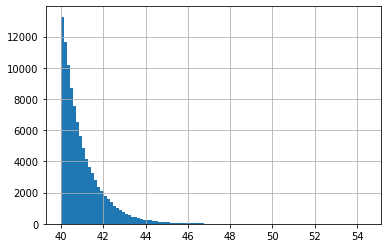

In [13]:
poblacion['numbers'].hist(bins=100)

In [14]:
muestra_promedio = []
tamano = 5000

for i in range(0, tamano):
    muestra_promedio.append(poblacion.sample(n=100).mean().values[0])

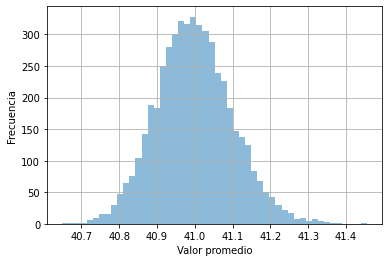

In [15]:
fix, ax = plt.subplots()
ax.hist(muestra_promedio, bins=50, alpha=0.5)
ax.set_xlabel('Valor promedio')
ax.set_ylabel('Frecuencia')
ax.grid()

## Distribuciones muestrales:
* Estimador: Funcion de la muestra

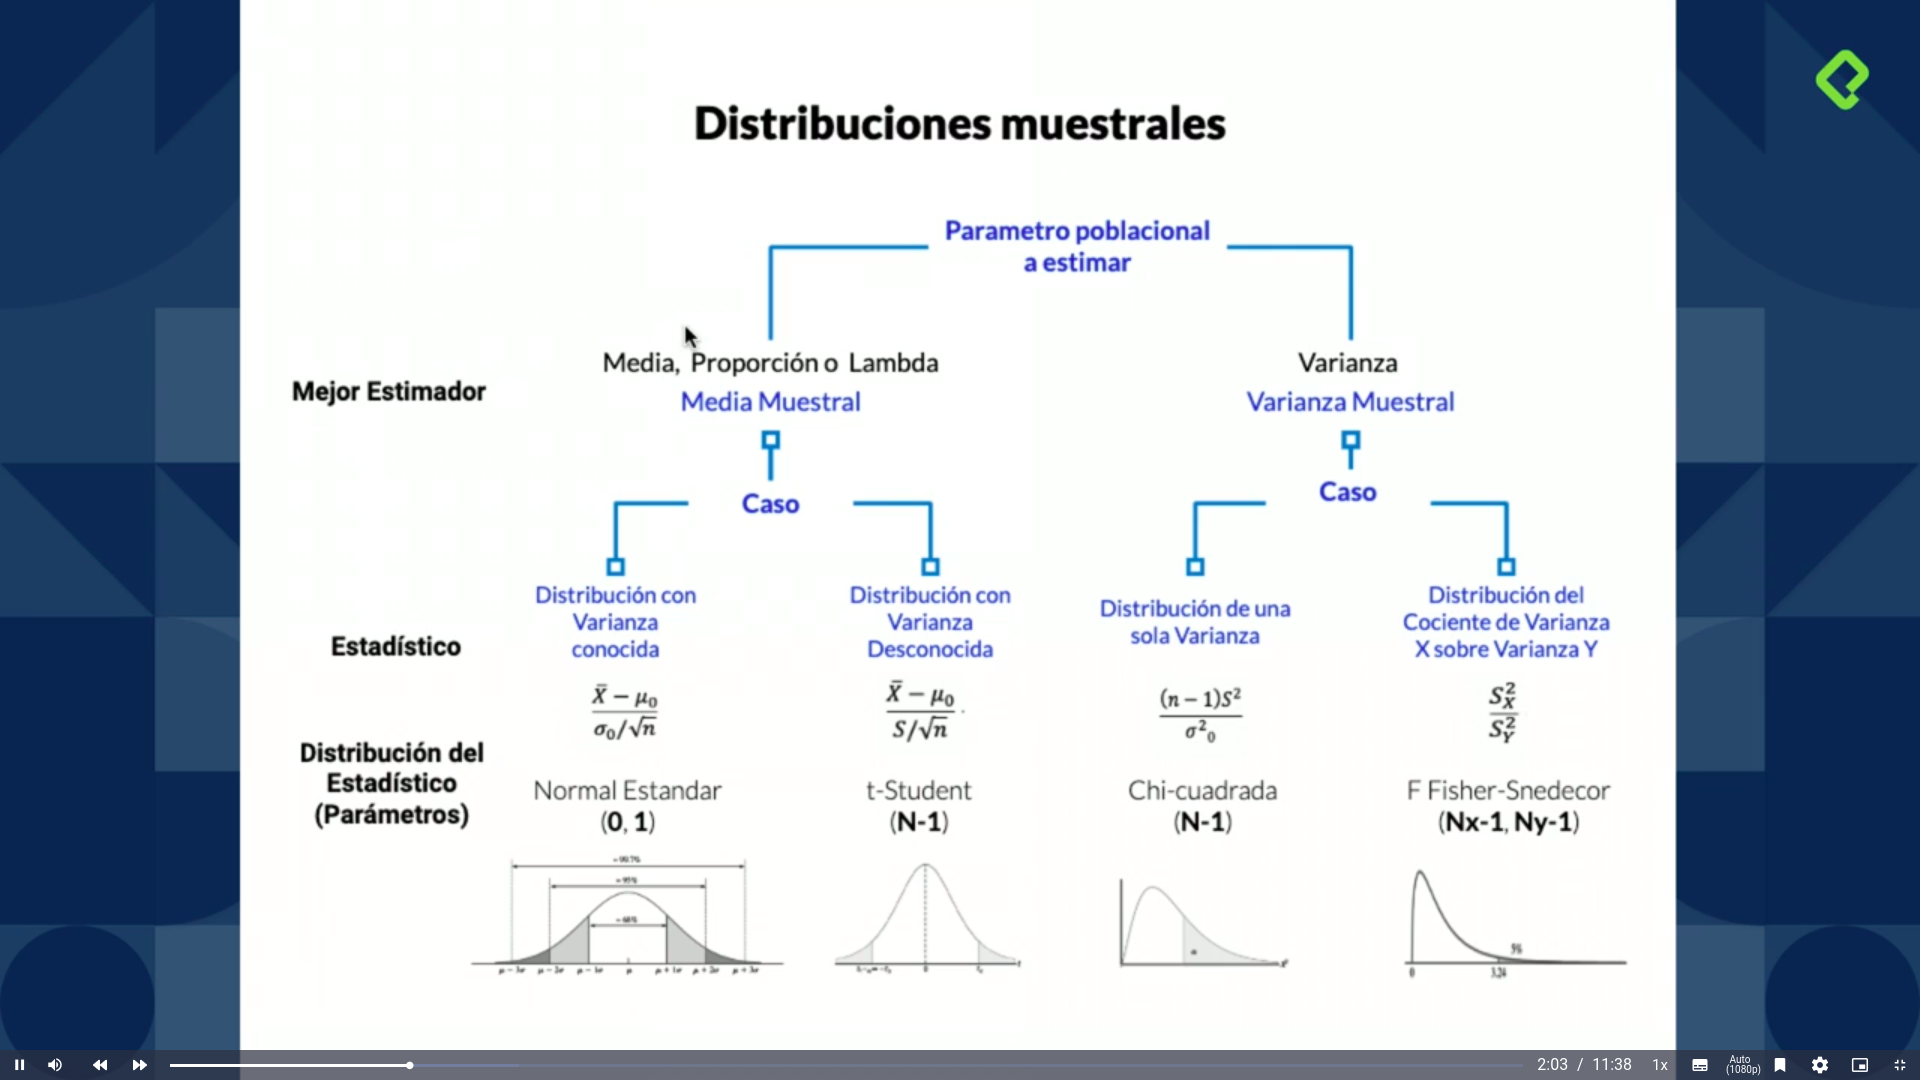

In [130]:
Image('Screenshot from 2021-05-20 12-43-35.png')

In [131]:
import os
from IPython.core.display import Image
import seaborn as sns

from scipy.stats import t
from scipy.stats import norm

In [132]:
os.listdir('.')

['titanic-master-table.csv',
 'intervalos de confianza.ipynb',
 'modelo-reg-log.pkl',
 'train.csv',
 'iris-data.csv',
 'Hyp Test.ipynb',
 'rating-peliculas.csv',
 'test.csv',
 'compensacion-ejecutivos.sav',
 '.ipynb_checkpoints',
 'montecarlo4.jpg',
 'stats.png',
 'bicicletas-compartidas.csv',
 'Screenshot from 2021-05-20 12-43-35.png',
 'modelo-arbol-class.pkl',
 'Codigo del Curso.ipynb',
 'juego-azar.csv',
 'peliculas.png',
 'erores tipo 1 y 2.ipynb',
 'two way.png']

In [133]:
data1 = t.rvs(100, size=1000000)
data2 = t.rvs(50, size=1000000)

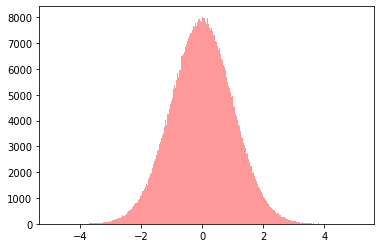

In [134]:
ax = sns.distplot(data1, bins=500, kde=False, color='red')

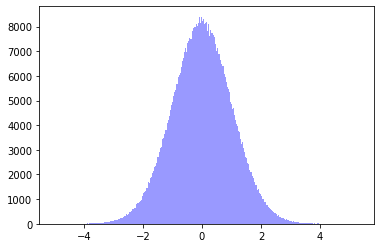

In [135]:
ax = sns.distplot(data2, bins=500, kde=False, color='b')

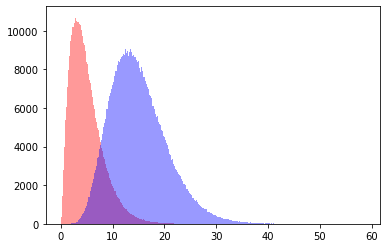

In [136]:
from scipy.stats import chi2

data1 = chi2.rvs(5, size=1000000)
data2 = chi2.rvs(15, size=1000000)

ax = sns.distplot(data1, bins=500, kde=False, color='red')
ax = sns.distplot(data2, bins=500, kde=False, color='b')

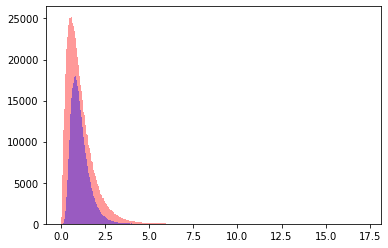

In [137]:
from scipy.stats import f

data1 = f.rvs(5,25, size=1000000)
data2 = f.rvs(15, 25, size=1000000)

ax = sns.distplot(data1, bins=500, kde=False, color='red')
ax = sns.distplot(data2, bins=500, kde=False, color='b')

In [138]:
#calculos de probabilidad usando f
f.pdf(4,15,25)

0.0019800859524222187

In [139]:
f.cdf(4,15,25)

0.9988900520089906

In [140]:
f.ppf(0.9988900520089906,14,24)

4.149863992122879

In [141]:
f.ppf(0.5,14,24)

0.979919760765592

## Estimadores de maxima verosimilitud
Aplicar la funcion de maxima verosimilitud

A ver, un paso a paso simplificado de lo que se hizo, porque si no tienes conceptos de cálculo se hace muy difícil entender, además se comenten unos errores en la explicación:

1. El método de máxima verosimilitud consiste en obtener el valor de lambda donde la L(lambda) sea máximo.

2. L(lambda) es la función de máxima verosimilitud, y está definida como el producto entre todos los valores de la muestra aleatoria evaluados en su función de densidad.

3. En este caso la distribución a estudiar es una exponencial, esto es importante, porque TODA distribución exponencial tiene función de densidad = parametro * e^(parametro*x), entonces ya tenemos una función con que trabajar.

4. Se desarrolla la función para después aplicar Logaritmo natural.

5. Por qué logaritmo natural? Por dos razones, una tiene que ver con lo práctico de utilizar logaritmos en términos operatorios, pero la mas importante es que, dadas las propiedades de los logaritmos, **la función L(lambda) es máxima en el mismo punto que Ln(L(lambda)). **

6. Se desarrolla la nueva función que se simplifica gracias a las propiedades de los logaritmos.

7. Por qué se deriva y se iguala a cero? recuerden que la primera derivada hace referencia a la pendiente de la función, y si la pendiente es cero significa que estamos en presencia de un mínimo o un máximo.

8. Acá falto algo, porque para poder asegurar que ese valor de lambda es máximo, se debe derivar por segunda vez, si la segunda derivada es < 0 entonces estamos frente a un máximo, no se puede asegurar nada sin hacer este análisis.

9. Sorpresa! el estimador de max verosimilitud de una función es el promedio muestral.

## Pruebas de hipotesis
Una prueba de hipotesis es una regla que especifica si podemos aceptar o rechazar una afirmacion basada en una muestra de la poblacion de analisis.

In [142]:
import pandas as pd
import numpy as np
%matplotlib inline  
import seaborn as sns
from scipy.stats import expon
from scipy.stats import uniform

In [143]:
muestra = [42, 35, 29, 45, 41, 57, 54, 47, 48, 56, 47, 35, 52, 31, 52, 55, 57, 58, 26, 29, 32, 37, 32, 34, 48, 20, 48, 51, 27, 24, 39, 40, 31, 34, 23, 24, 41, 58, 44, 48, 31, 23, 27, 55, 43, 47, 30, 57, 38, 51]
len(muestra)

50

In [144]:
# Hipotesis

from scipy.stats import expon
media, var, skew, kurt = expon.stats(scale = 30, moments = 'mvsk' )

In [145]:
# Paso 1: parametro lambda
# Paso 2: HP

mu = 30
mu > 30

# Paso 3. Mejor estimador
# Estimador
# PAso 4. Distribucion
promedio = np.mean(muestra)
promedio

40.66

In [146]:
# Paso 5
z = (promedio - mu)/np.sqrt(var/50) 
z

2.5125860958161983

In [147]:
# Paso 6

alpha = 0.05

# criterios de recha
from scipy.stats import norm
data_norm = norm.rvs( size =  1000000)

Text(0.5, 1.0, 'Distribucion normal')

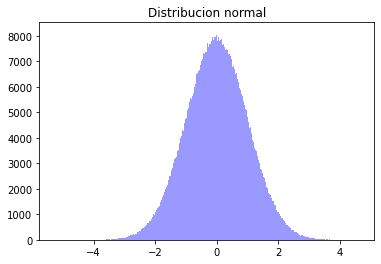

In [148]:
ax = sns.distplot(data_norm, bins = 500, kde = False, color = 'blue')
ax.set_title('Distribucion normal')

In [149]:
valor_critico = norm.ppf(1-alpha, loc = 0, scale = 1)
valor_critico

1.6448536269514722

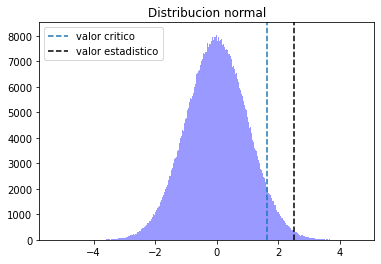

In [150]:
ax = sns.distplot(data_norm, bins = 500, kde = False, color = 'blue')
ax.set_title('Distribucion normal')
ax.axvline(x = valor_critico, linestyle = '--', label = 'valor critico')
ax.axvline(x = z, linestyle = '--', label = 'valor estadistico', color = 'k')
ax.legend()

## Errores tipo 1 y tipo 2

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

In [18]:
muestra = [42, 35, 29, 45, 41, 57, 54, 47, 48, 56, 47, 35, 52, 31, 52, 55, 57, 58, 26, 29, 32, 37, 32, 34, 48, 20, 48, 51, 27, 24, 39, 40, 31, 34, 23, 24, 41, 58, 44, 48, 31, 23, 27, 55, 43, 47, 30, 57, 38, 51]

In [19]:
# 

mu1 = 37
mu2 = 42

promedio = np.mean(muestra)
promedio

desv = 2

z_1 = (promedio - mu1)/desv
z_2 = (promedio - mu2)/desv

In [20]:
from scipy.stats import norm
data1 = norm.rvs( loc = mu1, scale = desv , size = 1000000 )
data2 = norm.rvs( loc = mu2, scale = desv , size = 1000000 )

/home/jp/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


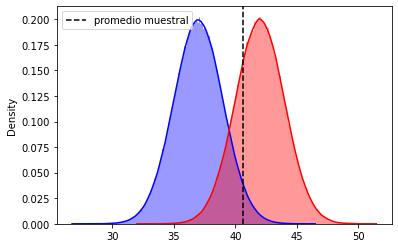

In [21]:
ax = sns.distplot( data1, bins = 500 , kde = True, color = 'blue')
ax = sns.distplot( data2, bins = 500 , kde = True, color = 'red')
ax.axvline( x = promedio, c = 'k', linestyle = '--', label = 'promedio muestral')
ax.legend()

In [22]:
# Error tipo 1 : p rechazar ho cuando esta es verdadera
p_prom_mu1= norm.cdf(z_1)
1- p_prom_mu1

0.03362496941962845

In [23]:
# Error 2: probaiblidad de no recharzar ho cuando esta es falsa
p_prom_mu2 = norm.cdf(z_2)
p_prom_mu2

0.2514288950953095

## Intervalos de confianza

In [24]:
import pandas as pd
import numpy as np

In [159]:
Muestra = [4046, 2578, 3796, 3412, 3315, 3228, 3666, 3877, 3154, 4062, 4365, 3776, 3761, 2587, 2911, 3184, 3810, 4459, 3385, 3899, 3602, 2701, 2821, 2790, 2557, 2540, 4119, 2712, 2743, 2713, 4466, 3937, 3871, 4427, 3177, 2556, 2903, 3522, 4155, 4010, 4453, 3080, 3008, 3865, 3356, 2799, 3308, 2759, 4347, 2576, 4075, 3333, 2936, 3746, 3334, 3940, 4113, 4220, 3580, 3922]

In [160]:
from scipy.stats import norm

alpha = 0.05

In [161]:
lim_inf = norm.ppf(alpha/1) 
lim_sup = norm.ppf(1-(alpha/1)) 
lim_inf,lim_sup

(-1.6448536269514729, 1.6448536269514722)

In [162]:
promedio = np.mean(Muestra)
desviacion = np.std(Muestra)
len(Muestra)

60

In [163]:
lim_inf = lim_inf*desviacion + promedio
lim_sup = lim_sup*desviacion + promedio
lim_inf,lim_sup

(2494.1372815063205, 4450.629385160346)

## Regresion lineal

Es un modelo, algoritmo o funcion matematica que aproxima de forma optima la relacion entre una variable Y y una variable X de un set de variables.

Identificar variables X que mejor explican a Y.

In [31]:
!pip install pyreadstat==1.0.0

     |████████████████████████████████| 2.0MB 1.1MB/s eta 0:00:01


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import pyreadstat as pr

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

%matplotlib inline

In [34]:
!pip install pandas

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import pyreadstat as pr

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

%matplotlib inlineimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import pyreadstat as pr

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

%matplotlib inline

UsageError: unrecognized arguments: pandas as pd


In [37]:
arc = 'compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)
df.head()

salario  noasiat   gpa  postgrad  experien
0  99026.0      0.0  3.36       0.0      15.0
1  69190.0      1.0  2.35       1.0       9.0
2  95453.0      1.0  3.33       1.0      10.0
3  57695.0      1.0  3.37       0.0       2.0
4  94364.0      1.0  3.87       1.0       4.0

In [38]:
y = df['salario']
X = df[['gpa','experien']]

In [39]:
reg_lin = sm.OLS(y, sm.add_constant(X)).fit()#ORDINARY LEAST SQUARES

In [40]:
print(reg_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           7.37e-38
Time:                        10:01:54   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.2

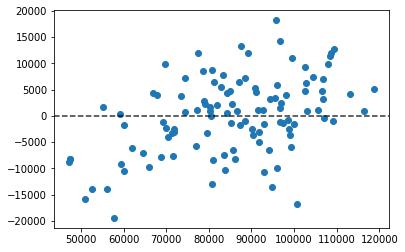

In [41]:
fig, ax = plt.subplots()
y_pred = reg_lin.predict(sm.add_constant(X))
ax.scatter(y, y-y_pred)

plt.axhline(y=0, color='black',alpha=0.8, linestyle='--')

Los errores como ahi arriba deben de distribuirse de manera aleatorioa alrededor del cero.

## Regresion Logistica

Nos permite aproximar el valor de una variable categorica aleatoria.

Pasariamos de una funcion lineal en la regresion lineal a una funcion logistica.

In [19]:
df.salario.describe()

count       110.000000
mean      85256.518182
std       16419.359283
min       47279.000000
25%       74379.000000
50%       86384.000000
75%       96827.250000
max      118683.000000
Name: salario, dtype: float64

In [21]:
y = np.where(df['salario']>96000, 1, 0)
X = df.drop(['salario'], axis=1)

Text(0.5, 0, 'y')

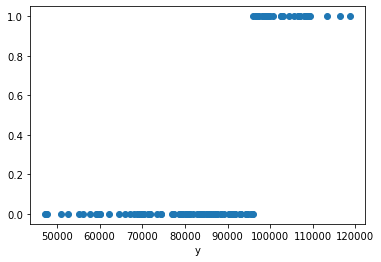

In [23]:
fig, ax = plt.subplots()
ax.scatter(df.salario, y)
ax.set_xlabel('salario')
ax.set_xlabel('y')

In [28]:
reg_log = linear_model.LogisticRegression()
reg_log.fit(X,y)
y_estimado = reg_log.predict_proba(X)
y_pred = reg_log.predict(X)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9090909090909091

## Arboles de regresion y de clasificacion

In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn .tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

     |████████████████████████████████| 278 kB 1.0 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24567 sha256=5fe0f7f6269a56f4573ebe6f78bd81b10783be6a95a950d5caa06d32cd0259eb
  Stored in directory: /home/jp/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
You should consider upgrading via the '/home/jp/anaconda3/bin/python -m pip install --upgrade pip' command.


In [7]:
df = pd.read_csv('rating-peliculas.csv')
df.columns

Index(['pelicula', 'genero', 'ratings-rotten', 'ratings-audiencia',
       'costo-millones-usd', 'ano-estreno'],
      dtype='object')

In [8]:
y = df.genero

In [10]:
y.value_counts()

Comedy       172
Action       154
Drama        101
Horror        49
Thriller      36
Adventure     29
Romance       18
Name: genero, dtype: int64

In [15]:
X = df.drop(['genero','pelicula'], axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [18]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth= 3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [20]:
dot_data = StringIO()
export_graphviz(clf, out_file= dot_data, filled= True, rounded=True, special_characters=True, feature_names=X.columns,class_names=y.value_counts().index)

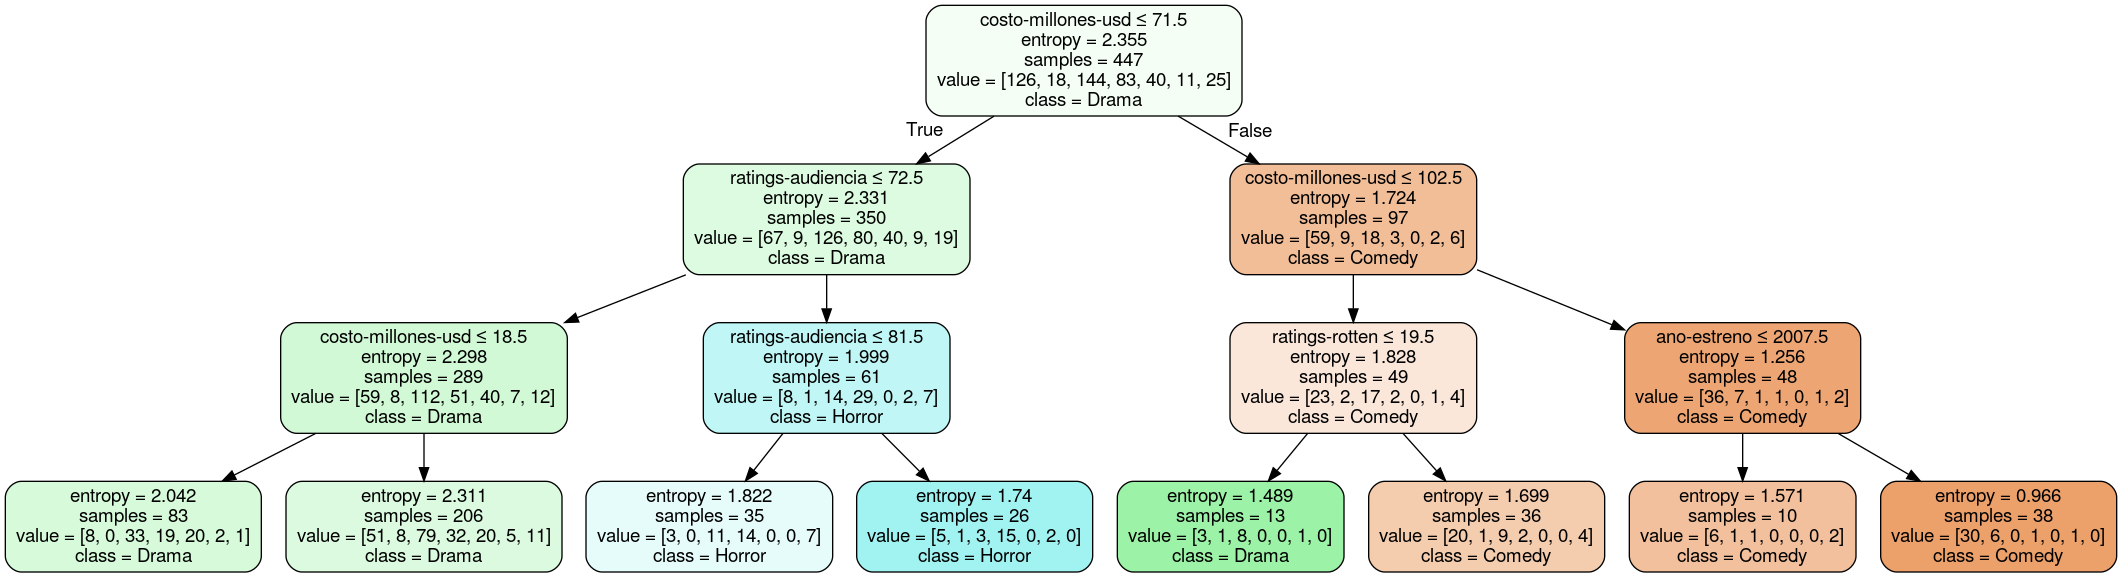

In [22]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('peliculas.png')
Image(graph.create_png())

In [23]:
metrics.accuracy_score(y_test, y_pred)

0.375

## Proyecto analisis exploratorio: Descriptivos, outliers, creacion y seleccion de variables.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [63]:
df = pd.read_csv('train.csv')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
df.describe()

PassengerId    Survived         Age       SibSp       Parch  \
count   714.000000  714.000000  714.000000  714.000000  714.000000   
mean    448.582633    0.406162   29.699118    0.512605    0.431373   
std     259.119524    0.491460   14.526497    0.929783    0.853289   
min       1.000000    0.000000    0.420000    0.000000    0.000000   
25%     222.250000    0.000000   20.125000    0.000000    0.000000   
50%     445.000000    0.000000   28.000000    0.000000    0.000000   
75%     677.750000    1.000000   38.000000    1.000000    1.000000   
max     891.000000    1.000000   80.000000    5.000000    6.000000   

             Fare  is-Pclass-1  is-Pclass-2  is-Sex-male  is-Embarked-S  \
count  714.000000   714.000000   714.000000   714.000000     714.000000   
mean    34.694514     0.260504     0.242297     0.634454       0.775910   
std     52.918930     0.439217     0.428773     0.481921       0.417274   
min      0.000000     0.000000     0.000000     0.000000       0.000000   
25%      8.050000     0.000000     0.000000     0.000000       1.000000   
50%     15.741700     0.000000     0.000000     1.000000       1.000000   
75%     33.375000     1.000000     0.000000     1.000000       1.000000   
max    512.329200     1.000000     1.000000     1.000000       1.000000   

       is-Embarked-C  family_size  
count     714.000000   714.000000  
mean        0.182073     0.943978  
std         0.386175     1.483788  
min         0.000000     0.000000  
25%         0.000000     0.000000  
50%         0.000000     0.000000  
75%         0.000000     1.000000  
max         1.000000     7.000000

In [65]:
df.drop(['Cabin'], axis=1, inplace=True)

In [66]:
df = df[df.Age.notna()]

In [67]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [68]:
vars_disc = ['Survived', 'Sex', 'SibSp',
       'Parch', 'Embarked']

for i in vars_disc:
    df[i].value_counts()

In [69]:
vars_cat = ['Pclass','Sex','Embarked']

### One hot encoding

In [70]:
for i in vars_cat:
    categorias = df[i].value_counts().index

    for k in categorias:
        name = 'is-'+str(i)+'-'+str(k)
        df[name] = np.where(df[i] == k, 1, 0)
        
    df = df.drop([i], axis=1)

In [71]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'is-Pclass-3', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male',
       'is-Sex-female', 'is-Embarked-S', 'is-Embarked-C', 'is-Embarked-Q'],
      dtype='object')

In [72]:
df['family_size'] = df['SibSp'] + df['Parch']

In [73]:
corr = df.corr()

<AxesSubplot:>

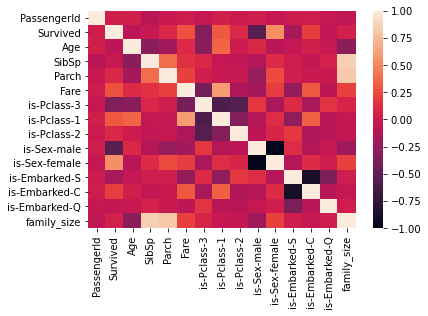

In [74]:
sns.heatmap(corr)

In [57]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'family_size'],
      dtype='object')

In [75]:
df.drop(['is-Pclass-3','is-Sex-female','is-Embarked-Q'], axis=1, inplace=True)

## Proyecto analisis predictivo

In [92]:
df = pd.read_csv('titanic-master-table.csv')

In [93]:
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Name', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male',
       'is-Embarked-S', 'is-Embarked-C', 'family_size'],
      dtype='object')

In [1]:
!pip install pandoc

In [2]:
import pandoc

FileNotFoundError: [Errno 2] No such file or directory: '/home/jp/snap/jupyter/common/lib/python3.7/site-packages/pandoc/definitions/1.16.hs'

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     613 non-null    int64  
 1   PassengerId    613 non-null    int64  
 2   Survived       613 non-null    int64  
 3   Name           613 non-null    object 
 4   Age            613 non-null    float64
 5   SibSp          613 non-null    int64  
 6   Parch          613 non-null    int64  
 7   Ticket         613 non-null    object 
 8   Fare           613 non-null    float64
 9   is-Pclass-1    613 non-null    int64  
 10  is-Pclass-2    613 non-null    int64  
 11  is-Sex-male    613 non-null    int64  
 12  is-Embarked-S  613 non-null    int64  
 13  is-Embarked-C  613 non-null    int64  
 14  family_size    613 non-null    int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 72.0+ KB


In [94]:
y = df['Survived']
X = df[['Age', 'SibSp',
       'Parch', 'Fare', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male',
       'is-Embarked-S', 'is-Embarked-C', 'family_size']]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=1)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = [
    (LogisticRegression(), 'reg-log'),
    (DecisionTreeClassifier(),'arbol-class')
]

In [99]:
import joblib

for model, name in clf:
    #entrenar
    model.fit(X_train, y_train)
    
    #medir
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(name)
    print('Resultado en la prueba del modelo: ', round(accuracy*100,2),'%')
    #guardar
    job_file = 'modelo-'+name+'.pkl'
    joblib.dump(model, job_file)

reg-log
Resultado en la prueba del modelo:  79.35 %
arbol-class
Resultado en la prueba del modelo:  75.0 %


/home/jp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Inferential Statistics Resume

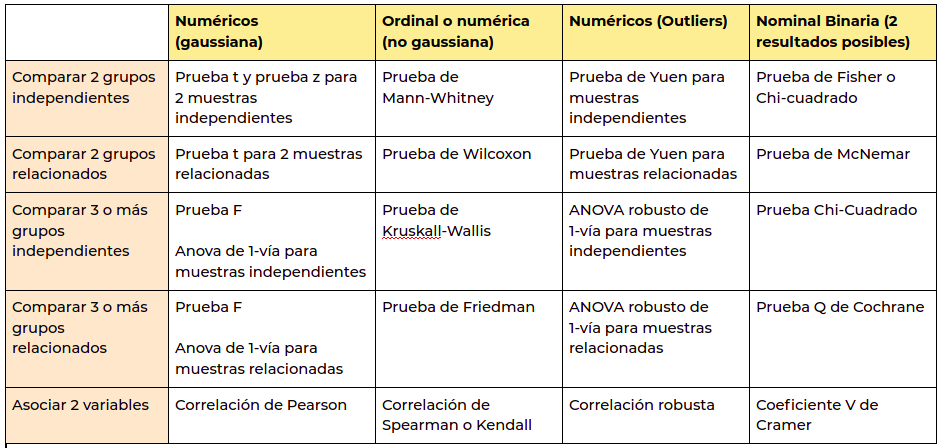

In [12]:
from IPython.display import Image
Image(filename='stats.png')

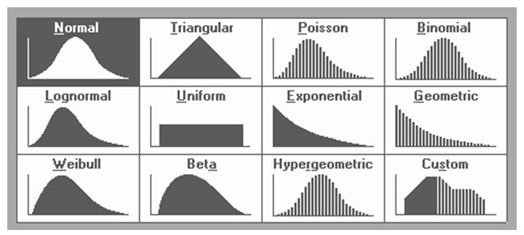

In [13]:
Image(filename='montecarlo4.jpg')

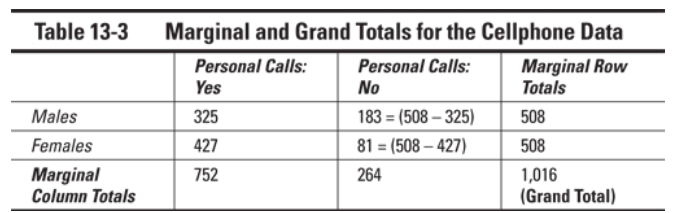

In [14]:
Image(filename='two way.png')